In [1]:
import yfinance as yf

google_stock = yf.download('GOOGL', start='2004-08-19', end='2024-10-04')
google_stock.to_csv('google_stock_data.csv')

[*********************100%***********************]  1 of 1 completed


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

google_stock = pd.read_csv('google_stock_data.csv')
google_stock.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,2.504808,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,2.703765,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,2.730976,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,2.617892,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,2.646101,183772044


In [3]:
google_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5066 entries, 0 to 5065
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5066 non-null   object 
 1   Open       5066 non-null   float64
 2   High       5066 non-null   float64
 3   Low        5066 non-null   float64
 4   Close      5066 non-null   float64
 5   Adj Close  5066 non-null   float64
 6   Volume     5066 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 277.2+ KB


In [4]:
google_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5066.000000,5066.000000,5066.000000,5066.000000,5066.000000,5.066000e+03
mean,46.359810,46.844761,45.881651,46.372866,46.262223,1.166650e+08
std,44.172699,44.656292,43.720060,44.195279,44.096882,1.474953e+08
min,2.482232,2.546046,2.401401,2.502753,2.496571,9.312000e+06
25%,13.139264,13.250375,12.987800,13.142831,13.110368,3.084500e+07
50%,27.840167,28.001501,27.579540,27.768499,27.699910,5.860835e+07
75%,61.509001,62.122500,60.977999,61.561625,61.409564,1.408467e+08
max,190.309998,191.750000,189.029999,191.179993,190.926636,1.643023e+09


In [5]:
google_stock.shape

(5066, 7)

In [6]:
google_stock.duplicated().sum()

0

In [7]:
google_stock.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
google_stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
# Prepare the dataset for Linear Regression
X = google_stock[['Open']]  # Using only open since that's what everyone will know
y = google_stock['Adj Close']                  # Target

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)


print(f'Mean Squared Error: {mse}')
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f'R-squared: {r2}')


# Calculate Adjusted R^2
n = len(y_test)  # Number of observations
p = X.shape[1]   # Number of predictors (features)
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R^2: {r2_adj}")

Mean Squared Error: 0.7329933567592727
Root Mean Squared Error (RMSE): 0.8561503120126002
R-squared: 0.9996232259358536
Adjusted R^2: 0.9996228536294661


In [10]:
joblib.dump(model, 'google_stock_prediction_model.pkl')

print("Model saved as google_stock_prediction_model.pkl")

Model saved as google_stock_prediction_model.pkl


In [11]:
print(f'Intercept: {model.intercept_}')


Intercept: -0.004513228398664637


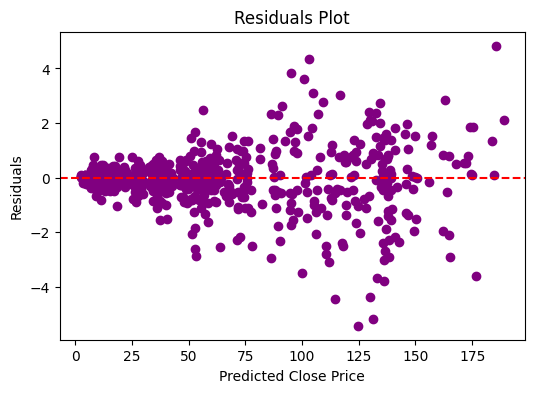

In [12]:
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')
plt.show()


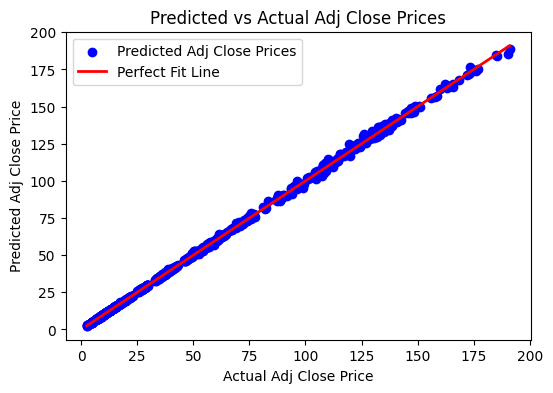

In [13]:
# Predicted vs. Actual Close Prices Plot
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Adj Close Prices')  # Points where the x-axis is actual and y-axis is predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Fit Line')  # Line representing perfect prediction
plt.title('Predicted vs Actual Adj Close Prices')
plt.xlabel('Actual Adj Close Price')
plt.ylabel('Predicted Adj Close Price')
plt.legend()
plt.show()

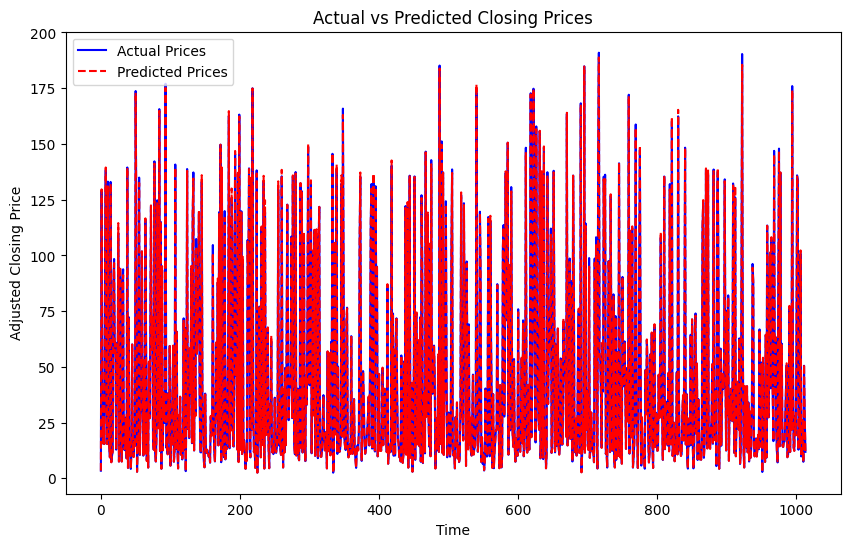

In [14]:
# Plotting the actual vs predicted stock prices
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.show()